In [1]:
# all the imports
import numpy as np
import matplotlib.pyplot as plt
import glob
import pickle
from PIL import Image, ImageFilter, ImageDraw

In [2]:
'''
Original code:
'''

# original_images = []
# pixelated_images = []
# blurred_images = []

# DOWNSAMPLE_TO = 64
# BLUR_INTENSITY = 3

# i = 0
# for img_path in glob.iglob('lfw/*/*.jpg'):
# #     if i == 10000:
# #         break
#     # Open image
#     img = Image.open(img_path)
#     img = img.resize((256, 256), resample=Image.BILINEAR)
    
#     # Resize smoothly down to 32x32 pixels using BILINEAR interpolation
#     # small_img = img.resize((DOWNSAMPLE_TO,DOWNSAMPLE_TO),resample=Image.BILINEAR)
    
#     # Scale back up using NEAREST to original size
#     pixelated_img = small_img.resize(img.size,resample=Image.NEAREST)
    
#     # Get the blurred image using Gaussian Blur
# #     blurred_img = img.filter(ImageFilter.GaussianBlur(radius=BLUR_INTENSITY))
    
# #     original_images.append(np.array(img))
#     pixelated_images.append(np.array(pixelated_img))
# #     blurred_images.append(np.array(blurred_img))
    
#     i += 1

# # original_images = np.array(original_images, dtype='float') / 255.0
# pixelated_images = np.array(pixelated_images, dtype='float') / 255.0
# # blurred_images = np.array(blurred_images, dtype='float') / 255.0

'\nOriginal code:\n'

# Original Images

In [6]:
original_images = []

new_w = new_h = 128

i = 0
for img_path in glob.iglob('RDJ/*.jpg'):
    if i == 20:
        break
    # Open image
    img = Image.open(img_path)
#     img = img.resize((256, 256), resample=Image.BILINEAR)
    
    w, h = img.size
    
    left = (w - new_w)//2
    top = (h - new_h)//2
    right = (w + new_w)//2
    bottom = (h + new_h)//2
    
    img = img.crop((left, top, right, bottom))
    
    original_images.append(np.array(img))
    
    i += 1

original_images = np.array(original_images, dtype='float') / 255.0

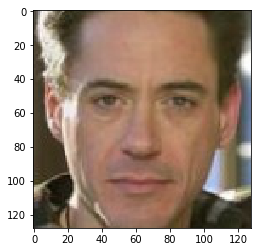

In [7]:
len(original_images)
plt.imshow(original_images[0])

In [24]:
part1 = original_images[:int(1/6*(len(original_images)))]
part2 = original_images[int(1/6*(len(original_images))):int(2/6*(len(original_images)))]
part3 = original_images[int(2/6*(len(original_images))):int(3/6*(len(original_images)))]
part4 = original_images[int(3/6*(len(original_images))):int(4/6*(len(original_images)))]
part5 = original_images[int(4/6*(len(original_images))):int(5/6*(len(original_images)))]
part6 = original_images[int(5/6*(len(original_images))):]

In [25]:
with open('datasets/original.pickle', 'wb') as f:
    pickle.dump(part1, f)
with open('datasets/original.pickle', 'ab') as f:
    pickle.dump(part2, f)
with open('datasets/original.pickle', 'ab') as f:
    pickle.dump(part3, f)
with open('datasets/original.pickle', 'ab') as f:
    pickle.dump(part4, f)
with open('datasets/original.pickle', 'ab') as f:
    pickle.dump(part5, f)
with open('datasets/original.pickle', 'ab') as f:
    pickle.dump(part6, f)

# Pixelated Images

In [11]:
# del original_images

pixelated_images = []

DOWNSAMPLE_TO = 20

new_w = new_h = 128

i = 0
for img_path in glob.iglob('RDJ/*.jpg'):
#     if i == 10000:
#         break
    # Open image
    img = Image.open(img_path)
#     img = img.resize((256, 256), resample=Image.BILINEAR)
    
    # crop the image
    w, h = img.size
    left = (w - new_w)//2
    top = (h - new_h)//2
    right = (w + new_w)//2
    bottom = (h + new_h)//2
    img = img.crop((left, top, right, bottom))
    
    # Resize smoothly down to small pixels using BILINEAR interpolation
    small_img = img.resize((DOWNSAMPLE_TO,DOWNSAMPLE_TO),resample=Image.BILINEAR)
    
    # Scale back up using NEAREST to original size
    pixelated_img = small_img.resize(img.size,resample=Image.NEAREST)
    
    del img

    pixelated_images.append(np.array(pixelated_img))
    
    i += 1

pixelated_images = np.array(pixelated_images, dtype='float') / 255.0

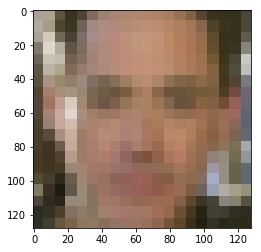

In [12]:
plt.imshow(pixelated_images[0])

In [6]:
part1 = pixelated_images[:int(1/6*(len(pixelated_images)))]
part2 = pixelated_images[int(1/6*(len(pixelated_images))):int(2/6*(len(pixelated_images)))]
part3 = pixelated_images[int(2/6*(len(pixelated_images))):int(3/6*(len(pixelated_images)))]
part4 = pixelated_images[int(3/6*(len(pixelated_images))):int(4/6*(len(pixelated_images)))]
part5 = pixelated_images[int(4/6*(len(pixelated_images))):int(5/6*(len(pixelated_images)))]
part6 = pixelated_images[int(5/6*(len(pixelated_images))):]

In [7]:
with open('datasets/pixelated-32.pickle', 'wb') as f:
    pickle.dump(part1, f)
with open('datasets/pixelated-32.pickle', 'ab') as f:
    pickle.dump(part2, f)
with open('datasets/pixelated-32.pickle', 'ab') as f:
    pickle.dump(part3, f)
with open('datasets/pixelated-32.pickle', 'ab') as f:
    pickle.dump(part4, f)
with open('datasets/pixelated-32.pickle', 'ab') as f:
    pickle.dump(part5, f)
with open('datasets/pixelated-32.pickle', 'ab') as f:
    pickle.dump(part6, f)

# Blurred Images

In [13]:
# del pixelated_images

blurred_images = []

BLUR_INTENSITY = 4

new_w = new_h = 128

i = 0
for img_path in glob.iglob('RDJ/*.jpg'):
#     if i == 10000:
#         break
    # Open image
    img = Image.open(img_path)
#     img = img.resize((256, 256), resample=Image.BILINEAR)
    
    # crop the image
    w, h = img.size
    left = (w - new_w)//2
    top = (h - new_h)//2
    right = (w + new_w)//2
    bottom = (h + new_h)//2
    img = img.crop((left, top, right, bottom))
    
    # Get the blurred image using Gaussian Blur
    blurred_img = img.filter(ImageFilter.GaussianBlur(radius=BLUR_INTENSITY))
    
    del img
    
    blurred_images.append(np.array(blurred_img))
    
    i += 1

blurred_images = np.array(blurred_images, dtype='float') / 255.0

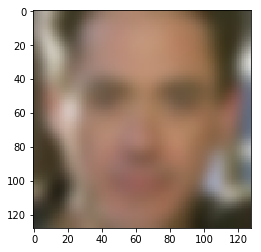

In [15]:
plt.imshow(blurred_images[0])

In [23]:
part1 = blurred_images[:int(1/6*(len(blurred_images)))]
part2 = blurred_images[int(1/6*(len(blurred_images))):int(2/6*(len(blurred_images)))]
part3 = blurred_images[int(2/6*(len(blurred_images))):int(3/6*(len(blurred_images)))]
part4 = blurred_images[int(3/6*(len(blurred_images))):int(4/6*(len(blurred_images)))]
part5 = blurred_images[int(4/6*(len(blurred_images))):int(5/6*(len(blurred_images)))]
part6 = blurred_images[int(5/6*(len(blurred_images))):]

In [24]:
with open('datasets/blurred-4.pickle', 'wb') as f:
    pickle.dump(part1, f)
with open('datasets/blurred-4.pickle', 'ab') as f:
    pickle.dump(part2, f)
with open('datasets/blurred-4.pickle', 'ab') as f:
    pickle.dump(part3, f)
with open('datasets/blurred-4.pickle', 'ab') as f:
    pickle.dump(part4, f)
with open('datasets/blurred-4.pickle', 'ab') as f:
    pickle.dump(part5, f)
with open('datasets/blurred-4.pickle', 'ab') as f:
    pickle.dump(part6, f)

# Blocked Images

In [18]:
del blocked_images

In [16]:
# code to check overlap - https://codereview.stackexchange.com/questions/31352/overlapping-rectangles

class Point(object):
    def __init__(self, x, y):
        self.x = x
        self.y = y

class Rect(object):
    def __init__(self, p1, p2):
        '''Store the top, bottom, left and right values for points 
               p1 and p2 are the (corners) in either order
        '''
        self.left   = min(p1.x, p2.x)
        self.right  = max(p1.x, p2.x)
        self.bottom = min(p1.y, p2.y)
        self.top    = max(p1.y, p2.y)

def overlap(r1, r2):
    '''Overlapping rectangles overlap both horizontally & vertically
    '''
    return range_overlap(r1.left, r1.right, r2.left, r2.right) and range_overlap(r1.bottom, r1.top, r2.bottom, r2.top)

def range_overlap(a_min, a_max, b_min, b_max):
    '''Neither range is completely greater than the other
    '''
    return (a_min <= b_max) and (b_min <= a_max)

In [17]:
import random

blocked_images = []

new_w = new_h = 128

box_size = 40

i = 0
for img_path in glob.iglob('RDJ/*.jpg'):
#     if i == 10:
#         break

    # Open image
    img = Image.open(img_path)
    
    w, h = img.size
    
    left = (w - new_w)//2
    top = (h - new_h)//2
    right = (w + new_w)//2
    bottom = (h + new_h)//2
    
    img = img.crop((left, top, right, bottom))
    
    draw = ImageDraw.Draw(img)
    
    overlapping = True
    
    while (overlapping):
        # generate coordinates for first box
        p1 = Point(random.randint(20, 108-box_size), random.randint(20, 108-box_size))
        p2 = Point(p1.x + box_size, p1.y + box_size)
        r1 = Rect(p1, p2)
        
        # generate coordinates for second box
        p3 = Point(random.randint(20, 108-box_size), random.randint(20, 108-box_size))
        p4 = Point(p3.x + box_size, p3.y + box_size)
        r2 = Rect(p3, p4)
        
        overlapping = overlap(r1, r2)
    
    
#     draw.rectangle((((128 - box_size) // 2, (128 - box_size) // 2), ((128 + box_size) // 2, (128 + box_size) // 2)), fill="black")
    draw.rectangle(((r2.left, r2.top), (r2.right, r2.bottom)), fill="black")
    draw.rectangle(((r1.left, r1.top), (r1.right, r1.bottom)), fill="black")
    
    blocked_images.append(np.array(img))
    
    i += 1

blocked_images = np.array(blocked_images, dtype='float') / 255.0

1


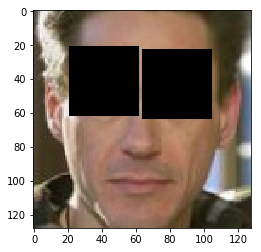

In [18]:
print(len(blocked_images))
plt.imshow(blocked_images[0])

In [15]:
part1 = blocked_images[:int(1/6*(len(blocked_images)))]
part2 = blocked_images[int(1/6*(len(blocked_images))):int(2/6*(len(blocked_images)))]
part3 = blocked_images[int(2/6*(len(blocked_images))):int(3/6*(len(blocked_images)))]
part4 = blocked_images[int(3/6*(len(blocked_images))):int(4/6*(len(blocked_images)))]
part5 = blocked_images[int(4/6*(len(blocked_images))):int(5/6*(len(blocked_images)))]
part6 = blocked_images[int(5/6*(len(blocked_images))):]

In [16]:
with open('datasets/blocked-center.pickle', 'wb') as f:
    pickle.dump(part1, f)
with open('datasets/blocked-center.pickle', 'ab') as f:
    pickle.dump(part2, f)
with open('datasets/blocked-center.pickle', 'ab') as f:
    pickle.dump(part3, f)
with open('datasets/blocked-center.pickle', 'ab') as f:
    pickle.dump(part4, f)
with open('datasets/blocked-center.pickle', 'ab') as f:
    pickle.dump(part5, f)
with open('datasets/blocked-center.pickle', 'ab') as f:
    pickle.dump(part6, f)

In [ ]:
# del original_images
def pixeate(imgpath):
    pixelated_images = []

    DOWNSAMPLE_TO = 32

    new_w = new_h = 128

    i = 0
    for img_path in glob.iglob('lfw/*/*.jpg'):
    #     if i == 10000:
    #         break
        # Open image
        img = Image.open(img_path)
    #     img = img.resize((256, 256), resample=Image.BILINEAR)

        # crop the image
        w, h = img.size
        left = (w - new_w)//2
        top = (h - new_h)//2
        right = (w + new_w)//2
        bottom = (h + new_h)//2
        img = img.crop((left, top, right, bottom))

        # Resize smoothly down to small pixels using BILINEAR interpolation
        small_img = img.resize((DOWNSAMPLE_TO,DOWNSAMPLE_TO),resample=Image.BILINEAR)

        # Scale back up using NEAREST to original size
        pixelated_img = small_img.resize(img.size,resample=Image.NEAREST)

        del img

        pixelated_images.append(np.array(pixelated_img))

        i += 1

    pixelated_images = np.array(pixelated_images, dtype='float') / 255.0